https://www.n2yo.com/satellite/?s=24876 

https://nssdc.gsfc.nasa.gov/nmc/spacecraft/display.action?id=1997-035A 

https://celestrak.com/GPS/almanac/Yuma/ 

https://www.gnssplanning.com/#/charts 

https://en.wikipedia.org/wiki/Geometrized_unit_system

https://arxiv.org/pdf/1309.5244.pdf 
https://scienceworld.wolfram.com/physics/MomentofInertiaEarth.html 
https://www.researchgate.net/publication/238189128_Effect_of_Equinoctial_Precession_on_Geosynchronous_Earth_Satellites

https://arxiv.org/pdf/2007.04341.pdf 
https://www.engbookspdf.com/uploads/pdf-books/SatelliteTechnologyPrinciplesandApplications3rdEdition-1.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import cm
import matplotlib.ticker as mtick
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [2]:
Q = 1.1e-3
v = 2.45e-13 #7.292e-5 / c
C = 8.034e40
M = 5.972e27
R = 6.3781e6
G = 6.674e-14
c = 3e8
m = G*M/c**2

In [3]:
m

0.004428569777777778

In [4]:
beta = 1.0
alpha = 1.0

In [5]:
def Delta_iota(iota, omega, ecc, a, beta = beta, alpha = alpha):
    Diota = (3*R**2*Q*m*np.pi*ecc**2/(8*(a**3)*(1-ecc**2)**3))*(np.sin(2*iota)*np.sin(2*omega))*(14/3 + (5*alpha - 20*beta/3.0))
    return Diota

def Delta_a(iota, omega, ecc, a, beta = beta, alpha = alpha):
    Da = (15*R**2*Q*m*np.pi*ecc**4*np.sin(2*omega)/ ((a**2)*(1-ecc**2)**4)) + \
    (3*R**2*Q*m*np.pi*ecc**2 / (4*(a**2)*(1-ecc**2)**4)) *(np.sin(iota)**2*np.sin(2*omega))*(-60 + 24*alpha*beta + ecc**2*(4*alpha*beta-25)) 
    return Da

def Delta_ecc(iota, omega, ecc, a, beta = beta, alpha = alpha):
    Decc = (15*R**2*Q*m*np.pi*(ecc**3)*np.sin(2*omega)/ (2*(a**3)*(1-(ecc**2))**3)) + \
    ((R**2*Q*m*np.pi*ecc)/(8*(a**3)*(1-ecc**2)**3)) * ((np.sin(iota)**2)*np.sin(2*omega)) * (-22+180*ecc + 30*(ecc**3) + 40*beta + 42*beta*alpha + (ecc**2)*(-239 - 40*beta + 42*beta*alpha))
    return Decc

def Delta_omega(iota, omega, ecc, a, beta = beta, alpha = alpha):
    Domega = ( (3*(R**2)*Q*np.pi*(3+5*np.cos(2*iota))) / (4*(a**2)*(1-ecc**2)**2)) - ( (2*m*np.pi*(4*beta - 7)) / (a*(1-ecc**2))) -\
    ( (12*G*C*v*np.pi*np.cos(iota)) / (np.sqrt(G*M)*(a**(3/2))*c*(1-ecc**2)**(3/2)) ) + \
    ( (R**2*Q*m*np.pi) / (4*(a**3)*(1-ecc**2)**3) ) * (ecc**2*(97+8*beta*(6*alpha -11))+4*(53 + (33*alpha - 68)*beta)) + \
    ( (R**2*Q*m*np.pi*ecc**2) / (4*(a**3)*(1-ecc**2)**3) ) * np.cos(2*omega) * (14+ 5*beta*(3*alpha - 4)) + \
    ( (R**2*Q*m*np.pi) / (8*a**3*(1-ecc**2)**3) ) * np.sin(iota)**2*( ecc**2*(227+2*beta*(57*alpha -100))+ 496 + 16*beta*(21*alpha - 40))  +\
    ( (R**2*Q*m*np.pi) / (8*a**3*R*(1-ecc**2)**3) ) * (np.sin(iota)**2*np.cos(2*omega)) * ((ecc**2)*(-88 + 100*alpha - 51*alpha*beta) -82 + 40*beta + 42*alpha*beta) -\
    ( (6*(1-beta)*G*C*c*m*(ecc)*np.pi) /  (G*M*a**(3)*(1-ecc**2)**3)   ) 
    return Domega

def Delta_Oomega(iota, omega, ecc, a, beta = beta, alpha = alpha):
    DOomega = (3*R**2*Q*np.pi*np.cos(iota)/((a**2) *(1-(ecc**2))**2)) + (6*G*C*v*np.pi / ((np.sqrt(G*M))*c*(a**(3/2))*(1-(ecc**2))**(3/2))) +\
    ((3*R**2*Q*m*np.pi*np.cos(iota) / ( 2*(a**3)* (1-(ecc**3))**3)) * ( 2*(5 + 4*(ecc**2)) + (2 + (ecc**2))*((5*alpha) - 8)*beta)) -\
    (3*R**2*Q*m*np.pi*np.cos(iota) / ( 2*(a**3)*(1-(ecc**3))**3)) * (ecc**2) * (np.cos(2*omega)) *( 3 + (((5/2.0)*alpha) - 4)* beta)
    return DOomega


 

In [6]:
def traj(a,e,iota,omega,Oomega,f):
    # Distance from the Sun to the poin on orbit
    r = a /(1.0 + e*np.cos(f))

    # Cartesian coordinates
    x = r*(np.cos(Oomega)*np.cos(f + omega) - np.sin(Oomega)*np.sin(f + omega)*np.cos(iota))
    y = r*(np.sin(Oomega)*np.cos(f + omega) + np.cos(Oomega)*np.sin(f + omega)*np.cos(iota))
    z = r*np.sin(f + omega)*np.sin(iota)

    return x,y,z

In [7]:
f = np.linspace(0, 2*np.pi, 100)

In [8]:
ecc0 = 0.01
a0 = 42164*1000 #6.61#42164*1000#6.61 #42164km/radiotierra
iota0 = 0.01*np.pi/180
omega0 =  0 * np.pi/180
Oomega0 = 0*np.pi/180

In [9]:
n = 2000
t = np.arange(n)

ecc = np.zeros(n)
omega = np.zeros(n)
iota = np.zeros(n)
a = np.zeros(n)
Oomega  = np.zeros(n)

#ecc[0] = ecc0

for i in t:
    ecc[i] = ecc0
    omega[i] = omega0
    iota[i] = iota0
    a[i] = a0
    Oomega[i] = Oomega0
    ecc0 = ecc0 + Delta_ecc(iota0, omega0, ecc0, a0)
    #print(Delta_ecc(iota0, omega0, ecc0, a0))
    # This conditional recognizes a numerical zero in Delta omega 
    # to prevent a numerical error due to a cumulative effect
    #if Delta_omega(iota0, omega0, ecc0, a0)==0: 
    #    omega0 = omega0
    #else:
        #omega0 = omega0 + Delta_omega(iota0, omega0, ecc0, a0)
    omega0 = omega0 + Delta_omega(iota0, omega0, ecc0, a0)
    iota0 = iota0 + Delta_iota(iota0, omega0, ecc0 , a0)
    a0 = a0 + Delta_a(iota0, omega0, ecc0, a0)
    Oomega0 = Oomega0 + Delta_Oomega(iota0, omega0, ecc0, a0)
        #print( omega0)
    #print(omega0)

In [10]:
print((3*(R**2)*Q*np.pi*(3+5*np.cos(2*iota))) / (4*(a**2)*(1-ecc**2)**2))
print(((3*(R**2)*Q*np.pi*(3+5*np.cos(2*iota))) / (4*(a**2)*(1-ecc**2)**2)).mean())

[0.00047455 0.00047455 0.00047455 ... 0.00047455 0.00047455 0.00047455]
0.00047454750441803064


In [11]:
print(( (2*m*np.pi*(4*beta - 7)) / (a*(1-ecc**2))))
print(( (2*m*np.pi*(4*beta - 7)) / (a*(1-ecc**2))).mean())

[-1.98000479e-09 -1.98000479e-09 -1.98000479e-09 ... -1.98000479e-09
 -1.98000479e-09 -1.98000479e-09]
-1.9800047948694582e-09


In [12]:
print(( (12*G*C*v*np.pi*np.cos(iota)) / (np.sqrt(G*M)*(a**(3/2))*c*(1-ecc**2)**(3/2)) ))
print((( (12*G*C*v*np.pi*np.cos(iota)) / (np.sqrt(G*M)*(a**(3/2))*c*(1-ecc**2)**(3/2)) )).mean())

[3.02060134e-11 3.02060134e-11 3.02060134e-11 ... 3.02060134e-11
 3.02060134e-11 3.02060134e-11]
3.0206013436123214e-11


In [13]:
print(( (R**2*Q*m*np.pi) / (4*(a**3)*(1-ecc**2)**3) ) * (ecc**2*(97+8*beta*(6*alpha -11))+4*(53 + (33*alpha - 68)*beta)))
print((( (R**2*Q*m*np.pi) / (4*(a**3)*(1-ecc**2)**3) ) * (ecc**2*(97+8*beta*(6*alpha -11))+4*(53 + (33*alpha - 68)*beta))).mean())


[1.49554837e-13 1.49554837e-13 1.49554837e-13 ... 1.49554837e-13
 1.49554837e-13 1.49554837e-13]
1.4955483715387764e-13


In [14]:
print(( (R**2*Q*m*np.pi*ecc**2) / (4*(a**3)*(1-ecc**2)**3) ) * np.cos(2*omega) * (14+ 5*beta*(3*alpha - 4)))
print((( (R**2*Q*m*np.pi*ecc**2) / (4*(a**3)*(1-ecc**2)**3) ) * np.cos(2*omega) * (14+ 5*beta*(3*alpha - 4))).mean())

[ 1.86928748e-18  1.86928664e-18  1.86928411e-18 ... -5.96090141e-19
 -5.97771389e-19 -5.99452098e-19]
9.330773202128996e-19


In [15]:
print(( (R**2*Q*m*np.pi) / (8*a**3*(1-ecc**2)**3) ) * np.sin(iota)**2*( ecc**2*(227+2*beta*(57*alpha -100))+ 496 + 16*beta*(21*alpha - 40)))
print((( (R**2*Q*m*np.pi) / (8*a**3*(1-ecc**2)**3) ) * np.sin(iota)**2*( ecc**2*(227+2*beta*(57*alpha -100))+ 496 + 16*beta*(21*alpha - 40))).mean())


[6.07423296e-21 6.07423296e-21 6.07423296e-21 ... 6.07423296e-21
 6.07423296e-21 6.07423296e-21]
6.074232955309636e-21


In [16]:
print(( (R**2*Q*m*np.pi) / (8*a**3*R*(1-ecc**2)**3) ) * (np.sin(iota)**2*np.cos(2*omega)) * ((ecc**2)*(-88 + 100*alpha - 51*alpha*beta) -82 + 40*beta + 42*alpha*beta))
print((( (R**2*Q*m*np.pi) / (8*a**3*R*(1-ecc**2)**3) ) * (np.sin(iota)**2*np.cos(2*omega)) * ((ecc**2)*(-88 + 100*alpha - 51*alpha*beta) -82 + 40*beta + 42*alpha*beta)).mean())

[-1.93433462e-32 -1.93433375e-32 -1.93433114e-32 ...  6.16832784e-33
  6.18572535e-33  6.20311729e-33]
-9.655463845461847e-33


In [17]:
( (6*(1-beta)*G*C*c*m*(ecc)*np.pi) /  (G*M*a**(3)*(1-ecc**2)**3)   ) 

array([0., 0., 0., ..., 0., 0., 0.])

In [18]:
x = np.zeros((len(ecc),len(f)))
y = np.zeros((len(ecc),len(f)))
z = np.zeros((len(ecc),len(f)))

In [19]:
for i in range (len(ecc)):
    for j in range(len(f)):
        x[i,j],y[i,j],z[i,j] = traj(a[i],ecc[i],iota[i],omega[i],Oomega[i],f[j])

In [20]:
def sphere():
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x_1 = 6.3781e6 * np.outer(np.cos(u), np.sin(v))
    y_1 = 6.3781e6 * np.outer(np.sin(u), np.sin(v))
    z_1 = 6.3781e6 * np.outer(np.ones(np.size(u)), np.cos(v))
    
    return x_1, y_1,z_1
    

In [21]:
x_1, y_1, z_1 = sphere()

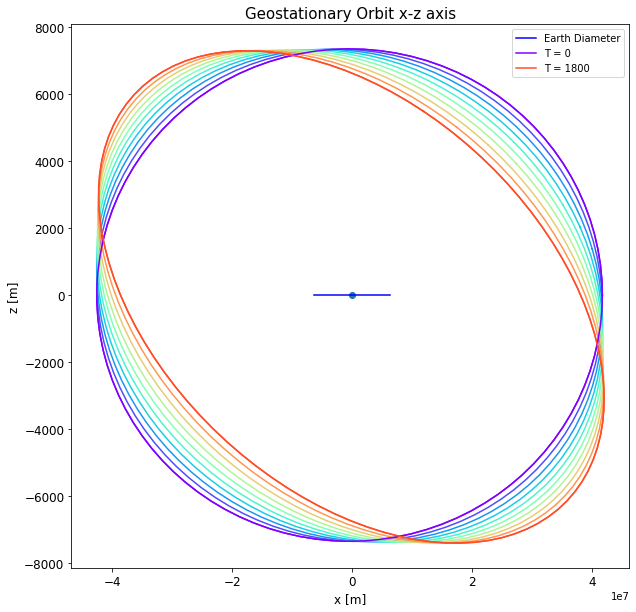

In [22]:
#fig = plt.figure(figsize = (10,10))
#ax = plt.axes(projection='3d')
fig,ax = plt.subplots(figsize = (10,10))
#ax.set_aspect('equal')

ax.grid(False)

color=cm.rainbow(np.linspace(0,1,len(ecc)))
for i in range(0,len(ecc),200):
    ax.plot(x[i], z[i], c= color[i])
ax.scatter(0, 0)
#ax.scatter(x[0][12], z[0][12], color = color[0], label = "T = 0")
#ax.scatter(x[1800][16], z[1800][16], color = color[1800], label = "T = 1800")
x_coordinates = [-6.3781e6, 6.3781e6]
y_coordinates = [0, 0]
ax.plot(x_coordinates, y_coordinates, color='blue', label = "Earth Diameter")
ax.plot(x[0], z[0], c= color[0], label = "T = 0")
ax.plot(x[1800], z[1800], c= color[1800], label = "T = 1800")
#ax.plot((0, x[0][12]),(0,z[0][12]),color = color[0] )
#ax.plot((0, x[1800][16]),(0,z[1800][16]),color = color[1800] )
#ax.plot(x3, y3, z3, label = "geo")
plt.legend()
#ax.auto_scale_xyz([min(x), max(x)], [max(y), max(y)], [min(z), max(z)])
#ax.set_xlim(min(z), max(z))
#ax.set_ylim(min(z), max(z))
#ax.set_ylim(min(z[1800]), max(z[1800]))
plt.title("Geostationary Orbit x-z axis", fontsize = 15)
ax.set_xlabel("x [m]", fontsize = 12)
ax.set_ylabel("z [m]", fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig("Geostationaryxzaxis.pdf",bbox_inches="tight" )

#ax.view_init(elev = -50, azim =-180)
#ax.view_init(elev = 10, azim =0)

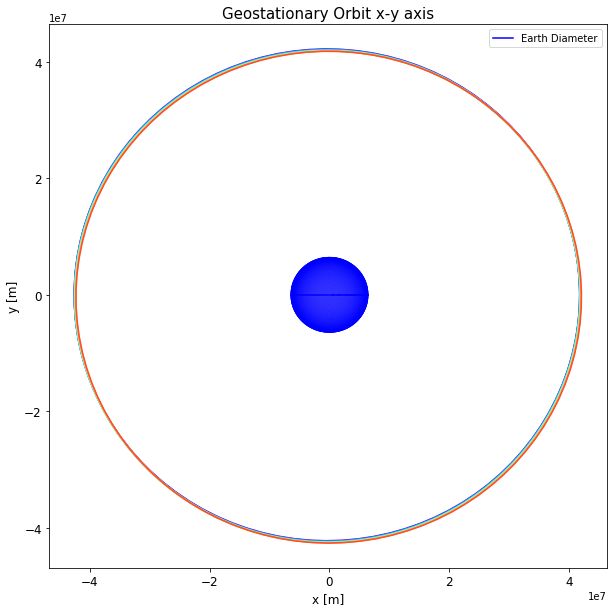

In [23]:
#fig = plt.figure(figsize = (10,10))
#ax = plt.axes(projection='3d')
fig,ax = plt.subplots(figsize = (10,10))
#ax.set_aspect('equal')


ax.grid(False)

#ax.plot_surface(x1, y1, z1,  rstride=4, cstride=4, color='b', linewidth=0, alpha=1)
ax.plot(x_1, y_1, color='b', alpha=0.5)
color=cm.rainbow(np.linspace(0,1,len(ecc)))
for i in range(0,len(ecc),200):
    ax.plot(x[i], y[i], c= color[i])
#ax.scatter(0, 0)
#ax.scatter(x[0][12], z[0][12], color = color[0], label = "T = 0")
#ax.scatter(x[1800][16], z[1800][16], color = color[1800], label = "T = 1800")
x_coordinates = [-6.3781e6, 6.3781e6]
y_coordinates = [0, 0]
ax.plot(x_coordinates, y_coordinates, color='blue', label = "Earth Diameter")
#ax.plot((0, x[0][12]),(0,z[0][12]),color = color[0] )
#ax.plot((0, x[1800][16]),(0,z[1800][16]),color = color[1800] )
#ax.plot(x3, y3, z3, label = "geo")
plt.legend()
#ax.auto_scale_xyz([min(x), max(x)], [max(y), max(y)], [min(z), max(z)])
#ax.set_xlim(min(z), max(z))
#ax.set_ylim(min(z), max(z))
#ax.set_ylim(min(z[1900]), max(z[1900]))
plt.title("Geostationary Orbit x-y axis", fontsize = 15)
ax.set_xlabel("x [m]", fontsize = 12)
ax.set_ylabel("y [m]", fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig("Geostationaryxyaxis.pdf",bbox_inches="tight" )

#ax.view_init(elev = -50, azim =-180)
#ax.view_init(elev = 10, azim =0)

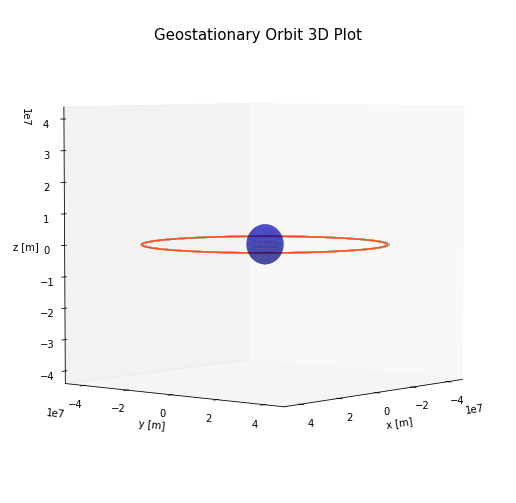

In [24]:
fig = plt.figure(figsize = (9,9))
ax = plt.axes(projection='3d')
#fig,ax = plt.subplots(figsize = (10,10))


ax.grid(False)

# Hide axes ticks
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_zticks([])

#ax.plot_surface(x1, y1, z1,  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.5)
ax.plot_surface(x_1, y_1, z_1, color='b', linewidth=0, alpha=0.5)
color=cm.rainbow(np.linspace(0,1,len(ecc)))
for i in range(0,len(ecc),200):
    ax.plot(x[i], y[i], z[i], c= color[i])
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_zlabel("z [m]")

#ax.set_ylim(min(z), max(z))
ax.set_zlim(min(x[1800]), max(x[1800]))
ax.zaxis.set_rotate_label(False)
#ax2.set_zlim(0,30)
#plt.zticks(fontsize=9)#, rotation=90)
#ax.zaxis.set_tick_params(labelsize=10)
plt.title("Geostationary Orbit 3D Plot", fontsize = 15)

#ax.view_init(elev = 10, azim =-90)
ax.view_init(elev = 4, azim =40)

plt.savefig("v3d.pdf",bbox_inches="tight" )

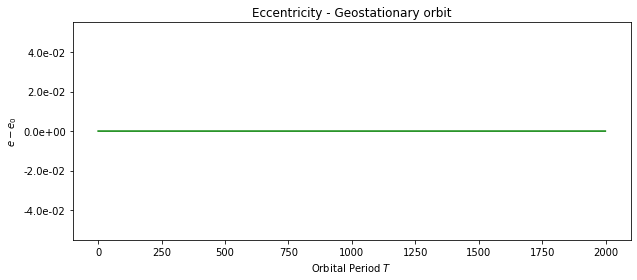

In [25]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(t,ecc-ecc[0], color='green')
ax.set_ylabel(r'$e - e_0$')
ax.set_xlabel(r'Orbital Period $T$')
ax.set_title(r'Eccentricity - Geostationary orbit')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1e'))

plt.savefig("ecc - Geostationary.pdf",bbox_inches="tight" )

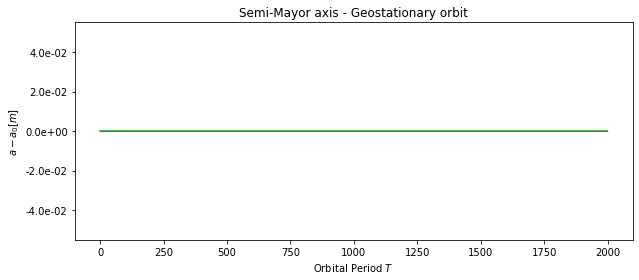

In [26]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(t,a-a[0], color='green')
ax.set_ylabel(r'$a - a_0 [m]$')
ax.set_xlabel(r'Orbital Period $T$')
ax.set_title(r'Semi-Mayor axis - Geostationary orbit')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1e'))

plt.savefig("a - Geostationary.pdf",bbox_inches="tight" )

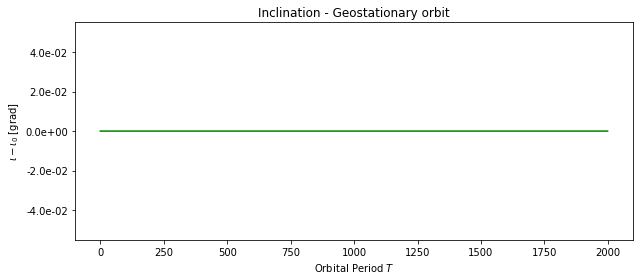

In [27]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(t,(iota*180/np.pi)%360-(iota[0]*180/np.pi)%360, color='green')
ax.set_ylabel(r'$\iota - \iota_0$ [grad]')
ax.set_xlabel(r'Orbital Period $T$')
ax.set_title(r'Inclination - Geostationary orbit')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1e'))

plt.savefig("inclination - Geostationary.pdf",bbox_inches="tight" )

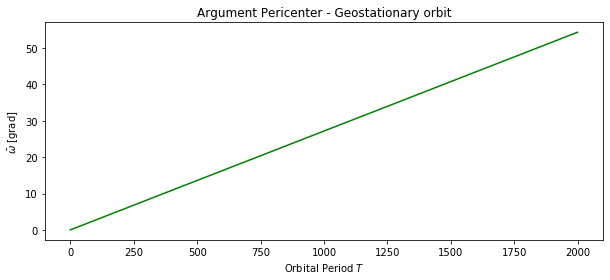

In [28]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(t,(omega*180/np.pi)%360, color='green')
ax.set_ylabel(r'$\bar\omega$ [grad]')
ax.set_xlabel(r'Orbital Period $T$')
ax.set_title(r'Argument Pericenter - Geostationary orbit')
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1e'))

plt.savefig("omega - Geostationary.pdf",bbox_inches="tight" )

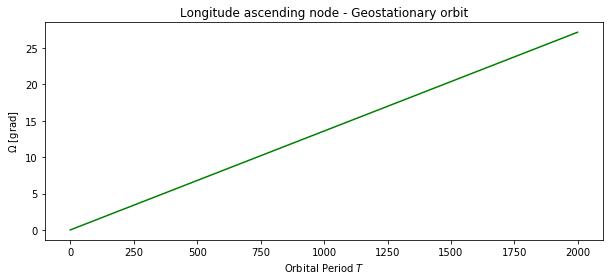

In [29]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(t,(Oomega*180/np.pi)%360, color='green')
ax.set_ylabel(r'$\Omega$ [grad]')
ax.set_xlabel(r'Orbital Period $T$')
ax.set_title(r'Longitude ascending node - Geostationary orbit')
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1e'))

plt.savefig("Oomega - Geostationary.pdf",bbox_inches="tight" )

# Molniya

In [30]:
ecc0m = 0.74
a0m = 26600000 #4.17 #26600km/radiotierra
iota0m = 63.43494882*np.pi/180.0 #63.43494882
omega0m = 270.0*np.pi/180.0
Oomega_0m = 310.3*np.pi/180.0
#print(omega0m)

n = 1200
t = np.arange(n)

eccm = np.full(n,0).astype(float)
omegam = np.full(n,0).astype(float)
iotam = np.full(n,0).astype(float)
am = np.full(n,0).astype(float)
Oomegam = np.full(n,0).astype(float)


for i in t:
    eccm[i] = ecc0m
    omegam[i] = omega0m
    iotam[i] = iota0m
    am[i] = a0m
    Oomegam[i] = Oomega_0m

    
    ecc0m = ecc0m + Delta_ecc(iota0m, omega0m, ecc0m, a0m)
    omega0m =  omega0m + Delta_omega(iota0m, omega0m, ecc0m, a0m)
    iota0m = iota0m + Delta_iota(iota0m, omega0m, ecc0m, a0m)
    a0m = a0m + Delta_a(iota0m, omega0m, ecc0m, a0m)
    Oomega_0m =  Oomega_0m + Delta_Oomega(iota0m, omega0m, ecc0m, a0m)



In [31]:
print((3*(R**2)*Q*np.pi*(3+5*np.cos(2*iotam))) / (4*(am**2)*(1-eccm**2)**2))
print(((3*(R**2)*Q*np.pi*(3+5*np.cos(2*iotam))) / (4*(am**2)*(1-eccm**2)**2)).mean())

[2.97048024e-13 2.97048024e-13 2.97048024e-13 ... 2.97048024e-13
 2.97048024e-13 2.97048024e-13]
2.970480244889938e-13


In [32]:
print(( (2*m*np.pi*(4*beta - 7)) / (am*(1-eccm**2))))
print(( (2*m*np.pi*(4*beta - 7)) / (am*(1-eccm**2))).mean())

[-6.93681931e-09 -6.93681931e-09 -6.93681931e-09 ... -6.93681931e-09
 -6.93681931e-09 -6.93681931e-09]
-6.936819309435463e-09


In [33]:
print(( (12*G*C*v*np.pi*np.cos(iotam)) / (np.sqrt(G*M)*(am**(3/2))*c*(1-eccm**2)**(3/2)) ))
print((( (12*G*C*v*np.pi*np.cos(iotam)) / (np.sqrt(G*M)*(am**(3/2))*c*(1-eccm**2)**(3/2)) )).mean())

[8.85828453e-11 8.85828453e-11 8.85828453e-11 ... 8.85828453e-11
 8.85828453e-11 8.85828453e-11]
8.85828453326329e-11


In [34]:
print(( (R**2*Q*m*np.pi) / (4*(am**3)*(1-eccm**2)**3) ) * (eccm**2*(97+8*beta*(6*alpha -11))+4*(53 + (33*alpha - 68)*beta)))
print((( (R**2*Q*m*np.pi) / (4*(am**3)*(1-eccm**2)**3) ) * (eccm**2*(97+8*beta*(6*alpha -11))+4*(53 + (33*alpha - 68)*beta))).mean())


[9.21830877e-12 9.21830877e-12 9.21830877e-12 ... 9.21830877e-12
 9.21830877e-12 9.21830877e-12]
9.218308774341657e-12


In [35]:
print(( (R**2*Q*m*np.pi*eccm**2) / (4*(am**3)*(1-eccm**2)**3) ) * np.cos(2*omegam) * (14+ 5*beta*(3*alpha - 4)))
print((( (R**2*Q*m*np.pi*eccm**2) / (4*(am**3)*(1-eccm**2)**3) ) * np.cos(2*omegam) * (14+ 5*beta*(3*alpha - 4))).mean())

[-4.40171538e-13 -4.40171538e-13 -4.40171538e-13 ... -4.40171538e-13
 -4.40171538e-13 -4.40171538e-13]
-4.4017153776272184e-13


In [36]:
print(( (R**2*Q*m*np.pi) / (8*am**3*(1-eccm**2)**3) ) * np.sin(iotam)**2*( eccm**2*(227+2*beta*(57*alpha -100))+ 496 + 16*beta*(21*alpha - 40)))
print((( (R**2*Q*m*np.pi) / (8*am**3*(1-eccm**2)**3) ) * np.sin(iotam)**2*( eccm**2*(227+2*beta*(57*alpha -100))+ 496 + 16*beta*(21*alpha - 40))).mean())


[9.61766772e-12 9.61766772e-12 9.61766772e-12 ... 9.61766772e-12
 9.61766772e-12 9.61766772e-12]
9.61766771811355e-12


In [37]:
print(( (R**2*Q*m*np.pi) / (8*am**3*R*(1-eccm**2)**3) ) * (np.sin(iotam)**2*np.cos(2*omegam)) * ((eccm**2)*(-88 + 100*alpha - 51*alpha*beta) -82 + 40*beta + 42*alpha*beta))
print((( (R**2*Q*m*np.pi) / (8*am**3*R*(1-eccm**2)**3) ) * (np.sin(iotam)**2*np.cos(2*omegam)) * ((eccm**2)*(-88 + 100*alpha - 51*alpha*beta) -82 + 40*beta + 42*alpha*beta)).mean())

[1.19622458e-19 1.19622458e-19 1.19622458e-19 ... 1.19622458e-19
 1.19622458e-19 1.19622458e-19]
1.1962245790279365e-19


In [38]:
ecc0m1 = 0.74
a0m1 = (26600*1000) #4.17 #26600km/radiotierra
iota0m1 = 63*np.pi/180 #63.43494882
omega0m1 = 270*np.pi/180
Oomega0m1 = 310.3*np.pi/180

n = 1200
t = np.arange(n)

eccm1 = np.zeros(n).astype(float)
omegam1 = np.zeros(n).astype(float)
iotam1 = np.zeros(n).astype(float)
am1 = np.zeros(n).astype(float)
Oomegam1 = np.zeros(n).astype(float)


for i in t:
    eccm1[i] = ecc0m1
    omegam1[i] = omega0m1
    iotam1[i] = iota0m1
    am1[i] = a0m1
    Oomegam1[i] = Oomega0m1

    ecc0m1 = ecc0m1 + Delta_ecc(iota0m1, omega0m1, ecc0m1, a0m1)
    omega0m1 = omega0m1+ Delta_omega(iota0m1, omega0m1, ecc0m1, a0m1)
    iota0m1 = iota0m1 + Delta_iota(iota0m1, omega0m1, ecc0m1, a0m1)
    a0m1 = a0m1 + Delta_a(iota0m1, omega0m1, ecc0m1, a0m1)
    Oomega0m1 = Oomega0m1 + Delta_Oomega(iota0m1, omega0m1, ecc0m1, a0m1)


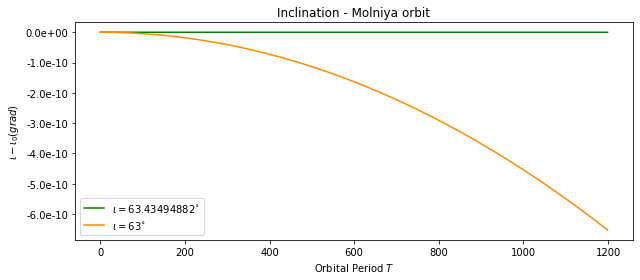

In [39]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(t,(iotam*180/np.pi)%360-(iotam[0]*180/np.pi)%360,color='green',label = "$\iota = 63.43494882^{\circ}$")
ax.plot(t,(iotam1*180/np.pi)%360-(iotam1[0]*180/np.pi)%360,color="darkorange",label = "$\iota = 63^{\circ}$")
ax.set_ylabel(r'$\iota  - \iota_0(grad)$')
ax.set_xlabel(r'Orbital Period $T$')
ax.set_title(r'Inclination - Molniya orbit')
plt.legend()
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1e'))

plt.savefig("inclination - Molniya.pdf",bbox_inches="tight" )

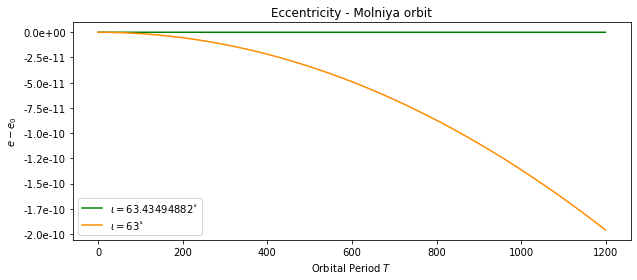

In [40]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(t,eccm-eccm[0],color='green',label = "$\iota = 63.43494882^{\circ}$")
ax.plot(t,eccm1-eccm1[0],color="darkorange",label = "$\iota = 63^{\circ}$")
ax.set_ylabel(r'$e - e_0$')
ax.set_xlabel(r'Orbital Period $T$')
ax.set_title(r'Eccentricity - Molniya orbit')
plt.legend()
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1e'))

plt.savefig("ecc - Molniya.pdf",bbox_inches="tight" )

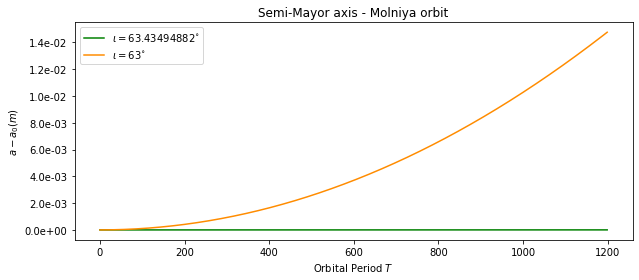

In [41]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(t,am-am[0],color='green',label = "$\iota = 63.43494882^{\circ}$")
ax.plot(t,am1-am1[0],color="darkorange",label = "$\iota = 63^{\circ}$")
ax.set_ylabel(r'$a  - a_0 (m)$')
ax.set_xlabel(r'Orbital Period $T$')
ax.set_title(r'Semi-Mayor axis - Molniya orbit')
plt.legend()
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1e'))

plt.savefig("a - Molniya.pdf",bbox_inches="tight" )

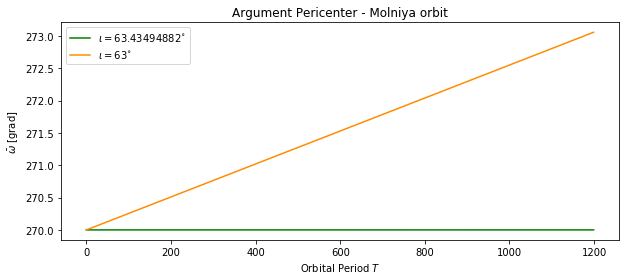

In [42]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(t,(omegam*180/np.pi)%360,color='green',label = "$\iota = 63.43494882^{\circ}$")
ax.plot(t,(omegam1*180/np.pi)%360,color="darkorange",label = "$\iota = 63^{\circ}$")
ax.set_ylabel(r'$\bar\omega$ [grad]')
ax.set_xlabel(r'Orbital Period $T$')
ax.set_title(r'Argument Pericenter - Molniya orbit')
plt.legend()
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1e'))

plt.savefig("omega - Molniya.pdf",bbox_inches="tight" )

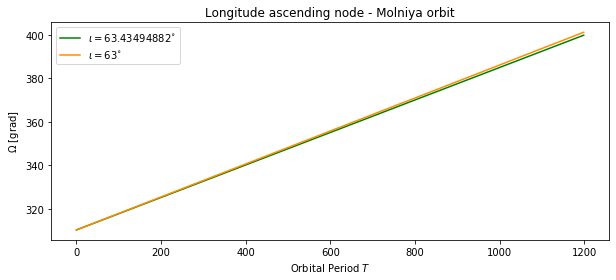

In [43]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(t,(Oomegam*180/np.pi),color='green',label = "$\iota = 63.43494882^{\circ}$")
ax.plot(t,(Oomegam1*180/np.pi),color="darkorange",label = "$\iota = 63^{\circ}$")
ax.set_ylabel(r'$\Omega$ [grad]')
ax.set_xlabel(r'Orbital Period $T$')
ax.set_title(r'Longitude ascending node - Molniya orbit')
plt.legend()
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1e'))

plt.savefig("Oomega - Molniya.pdf",bbox_inches="tight" )

In [44]:
xm = np.zeros((len(eccm),len(f)))
ym = np.zeros((len(eccm),len(f)))
zm = np.zeros((len(eccm),len(f)))

xm1 = np.zeros((len(eccm1),len(f)))
ym1 = np.zeros((len(eccm1),len(f)))
zm1 = np.zeros((len(eccm1),len(f)))

In [45]:
for i in range (len(eccm)):
    for j in range(len(f)):
        xm[i,j],ym[i,j],zm[i,j] = traj(am[i],eccm[i],iotam[i],omegam[i],Oomegam[i],f[j])
        xm1[i,j],ym1[i,j],zm1[i,j] = traj(am1[i],eccm1[i],iotam1[i],omegam1[i],Oomegam1[i],f[j])

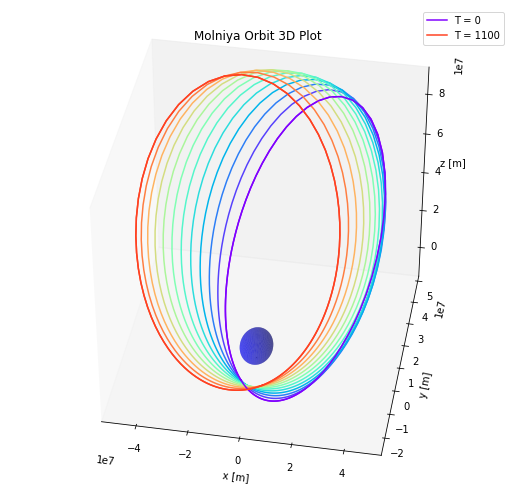

In [46]:
fig = plt.figure(figsize = (9,9))
ax = plt.axes(projection='3d')
#fig,ax = plt.subplots(figsize = (10,10))

ax.grid(False)

ax.plot_surface(x_1, y_1, z_1, color='b', linewidth=0, alpha=0.5)
color=cm.rainbow(np.linspace(0,1,len(eccm1)))
for i in range(0,len(eccm1),100):
    ax.plot(xm[i], ym[i], zm[i], c= color[i])

ax.plot(xm[0], ym[0], zm[0], c= color[0], label = "T = 0")
ax.plot(xm[1100], ym[1100], zm[1100], c= color[1100], label = "T = 1100")
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_zlabel("z [m]")

#ax.set_ylim(min(z), max(z))
#ax.set_zlim(min(xm[1800]), max(xm[1800]))
ax.zaxis.set_rotate_label(False)
#ax2.set_zlim(0,30)
#plt.zticks(fontsize=9)#, rotation=90)
#ax.zaxis.set_tick_params(labelsize=10)
plt.title("Molniya Orbit 3D Plot")
plt.legend()

#ax.view_init(elev = 10, azim =-90)
#ax.view_init(elev = 40, azim =100) #queda lindaaa
ax.view_init(elev = 40, azim =280) #nice nice
#ax.view_init(elev = 0, azim =45)
plt.savefig("molniya3d.pdf",bbox_inches="tight" )

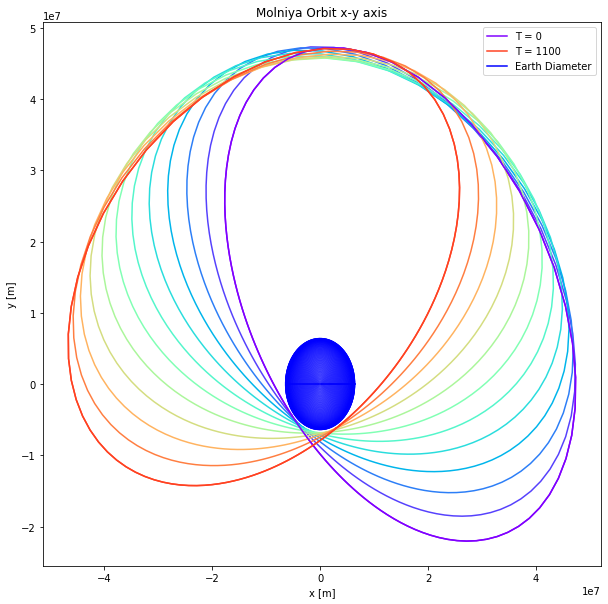

In [47]:
#fig = plt.figure(figsize = (10,10))
#ax = plt.axes(projection='3d')
fig,ax = plt.subplots(figsize = (10,10))
#ax.set_aspect('equal')

ax.grid(False)

ax.plot(x_1, y_1, color='b', alpha=0.5)
color=cm.rainbow(np.linspace(0,1,len(eccm1)))
for i in range(0,len(eccm1),100):
    ax.plot(xm[i], ym[i], c= color[i])
ax.plot(xm[0], ym[0], c= color[0], label = "T = 0")
ax.plot(xm[1100], ym[1100], c= color[1100], label = "T = 1100")
#ax.scatter(0, 0)
#ax.scatter(x[0][12], z[0][12], color = color[0], label = "T = 0")
#ax.scatter(x[1800][16], z[1800][16], color = color[1800], label = "T = 1800")
x_coordinates = [-6.3781e6, 6.3781e6]
y_coordinates = [0, 0]
ax.plot(x_coordinates, y_coordinates, color='blue', label = "Earth Diameter")
plt.legend()
#ax.set_xlim(min(z), max(z))
#ax.set_ylim(min(z), max(z))
#ax.set_ylim(min(xm[1100]), max(xm[1100]))
plt.title("Molniya Orbit x-y axis")
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")

plt.savefig("molniyaryxyaxis.pdf",bbox_inches="tight" )

#ax.view_init(elev = -50, azim =-180)
#ax.view_init(elev = 10, azim =0)

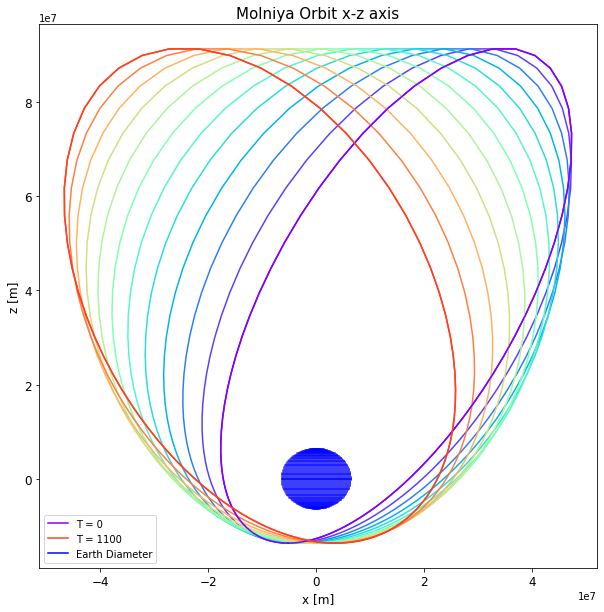

In [48]:
#fig = plt.figure(figsize = (10,10))
#ax = plt.axes(projection='3d')
fig,ax = plt.subplots(figsize = (10,10))
#ax.set_aspect('equal')

ax.grid(False)

ax.plot(x_1, z_1, color='b', alpha=0.5)
color=cm.rainbow(np.linspace(0,1,len(eccm1)))
for i in range(0,len(eccm1),100):
    ax.plot(xm[i], zm[i], c= color[i])
ax.plot(xm[0], zm[0], c= color[0], label = "T = 0")
ax.plot(xm[1100], zm[1100], c= color[1100], label = "T = 1100")
#ax.scatter(0, 0)
#ax.scatter(x[0][12], z[0][12], color = color[0], label = "T = 0")
#ax.scatter(x[1800][16], z[1800][16], color = color[1800], label = "T = 1800")
x_coordinates = [-6.3781e6, 6.3781e6]
y_coordinates = [0, 0]
ax.plot(x_coordinates, y_coordinates, color='blue', label = "Earth Diameter")
plt.legend()
#ax.set_xlim(min(z), max(z))
#ax.set_ylim(min(z), max(z))
#ax.set_ylim(min(z[1900]), max(z[1900]))
plt.title("Molniya Orbit x-z axis", fontsize = 15)
ax.set_xlabel("x [m]", fontsize = 12)
ax.set_ylabel("z [m]", fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig("molniyaryxzaxis.pdf",bbox_inches="tight" )

#ax.view_init(elev = -50, azim =-180)
#ax.view_init(elev = 10, azim =0)

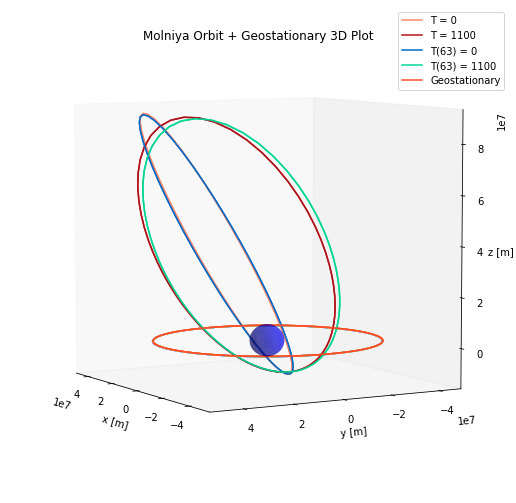

In [49]:
fig = plt.figure(figsize = (9,9))
ax = plt.axes(projection='3d')
#fig,ax = plt.subplots(figsize = (10,10))

ax.grid(False)

ax.plot_surface(x_1, y_1, z_1, color='b', linewidth=0, alpha=0.5)
color=cm.Reds(np.linspace(0,1,len(eccm)))
color1=cm.winter(np.linspace(0,1,len(eccm1)))
for i in range(500,len(eccm1),500):
    ax.plot(xm[i], ym[i], zm[i], c= color[i])
    ax.plot(xm1[i], ym1[i], zm1[i], c= color1[i])
colorg=cm.rainbow(np.linspace(0,1,len(ecc)))
for i in range(0,len(ecc),200):
    ax.plot(x[i], y[i], z[i], c= colorg[i])

ax.plot(xm[500], ym[500], zm[500], c= color[500], label = "T = 0")
ax.plot(xm[1000], ym[1000], zm[1000], c= color[1000], label = "T = 1100")

ax.plot(xm1[500], ym1[500], zm1[500], c= color1[500], label = "T(63) = 0")
ax.plot(xm1[1000], ym1[1000], zm1[1000], c= color1[1000], label = "T(63) = 1100")

ax.plot(x[1800], y[1800], z[1800], c= colorg[1800], label = "Geostationary")

ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_zlabel("z [m]")

#ax.set_ylim(min(z), max(z))
#ax.set_zlim(min(xm[1800]), max(xm[1800]))
ax.zaxis.set_rotate_label(False)
#ax2.set_zlim(0,30)
#plt.zticks(fontsize=9)#, rotation=90)
#ax.zaxis.set_tick_params(labelsize=10)
plt.title("Molniya Orbit + Geostationary 3D Plot")
plt.legend()

#ax.view_init(elev = 10, azim =-90)
#ax.view_init(elev = 40, azim =100) #queda lindaaa
ax.view_init(elev = 6, azim =150) #nice nice
#ax.view_init(elev = 0, azim =45)
plt.savefig("molniya3d+geostationary.pdf",bbox_inches="tight" )

In [52]:
for i in range(0,len(eccm1),100):
    print (i)

0
100
200
300
400
500
600
700
800
900
1000
1100


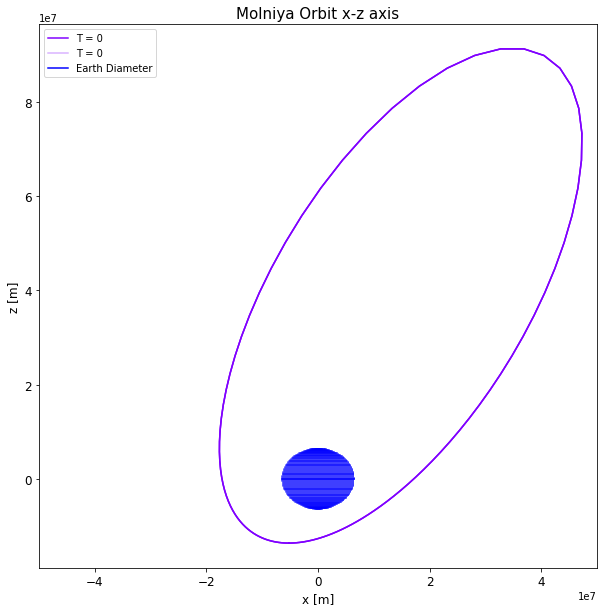

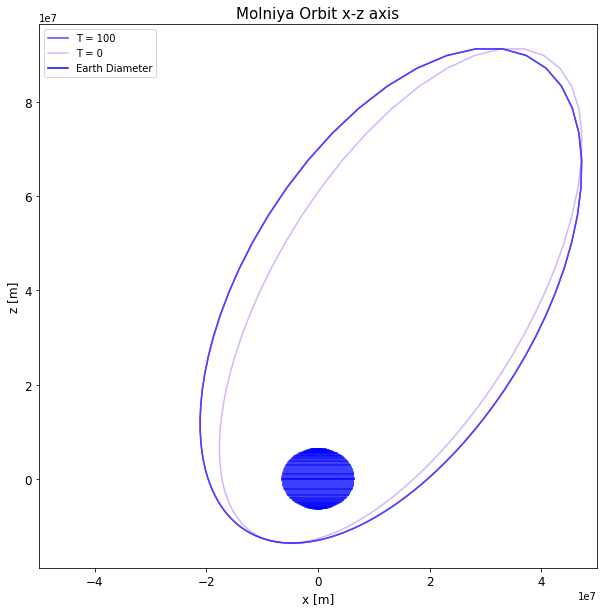

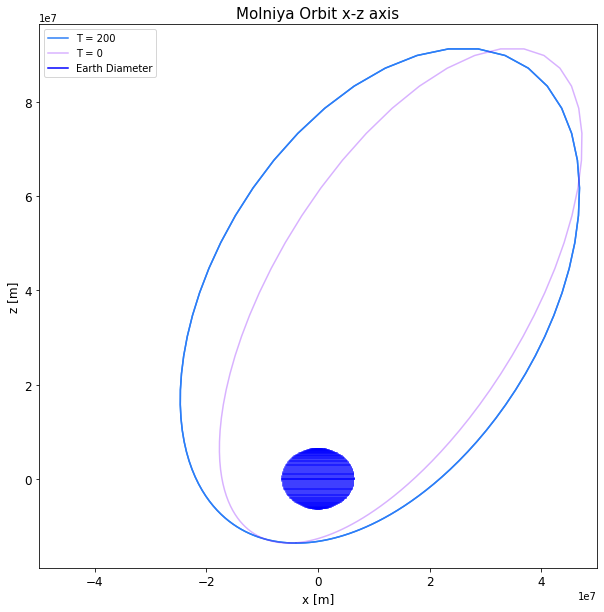

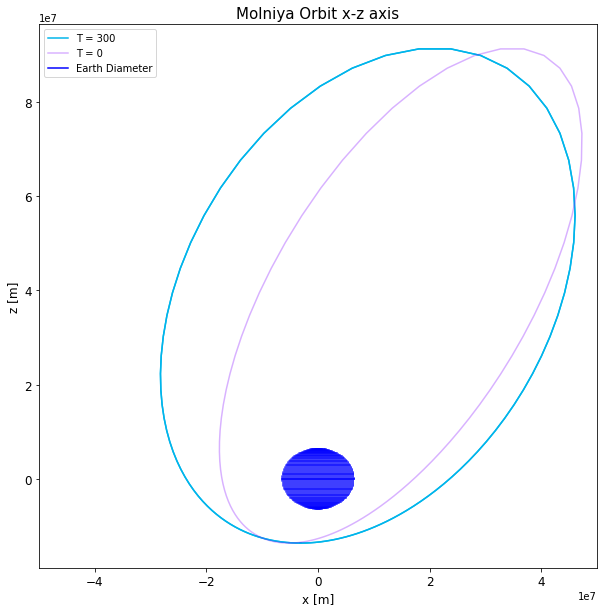

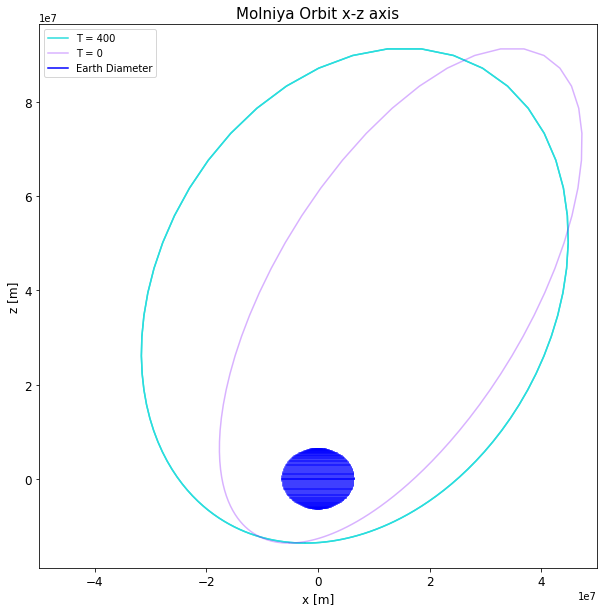

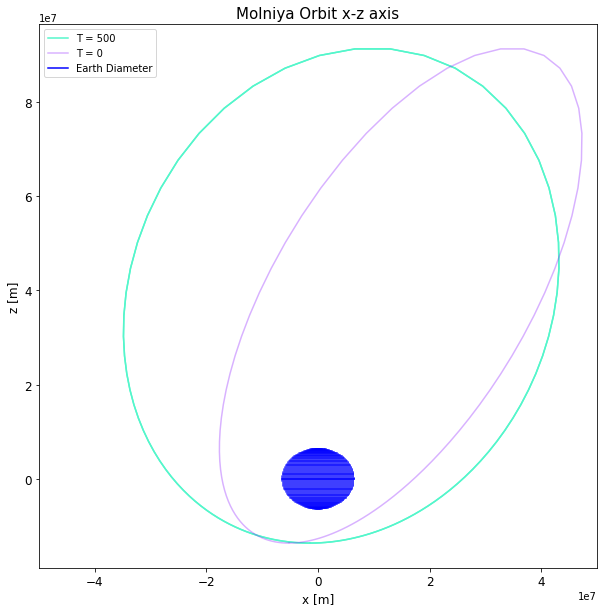

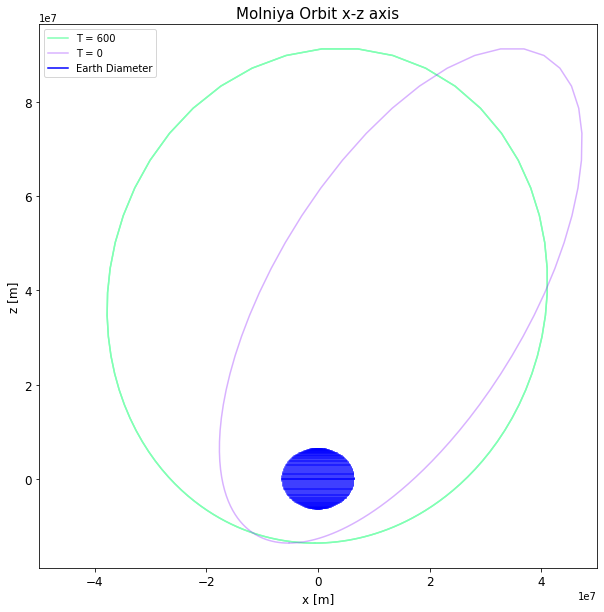

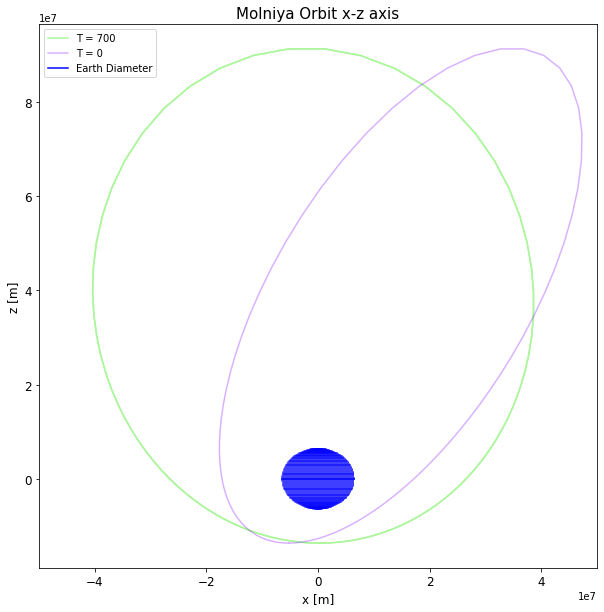

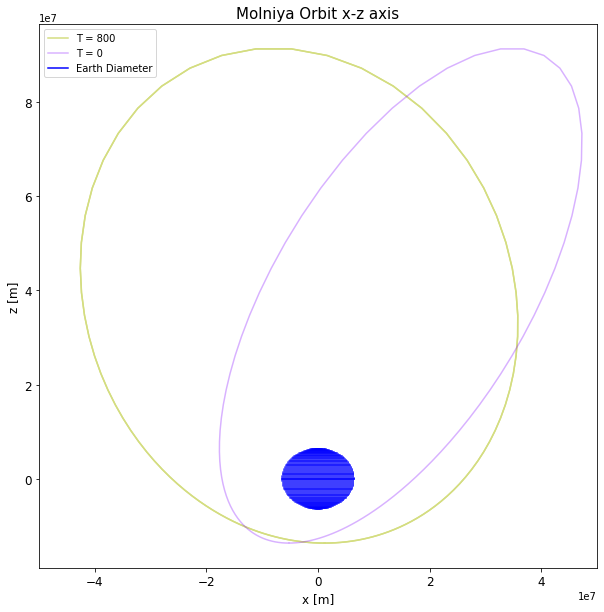

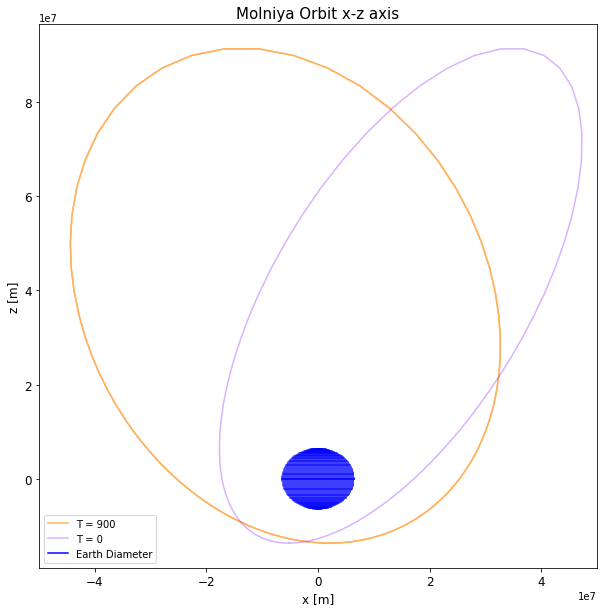

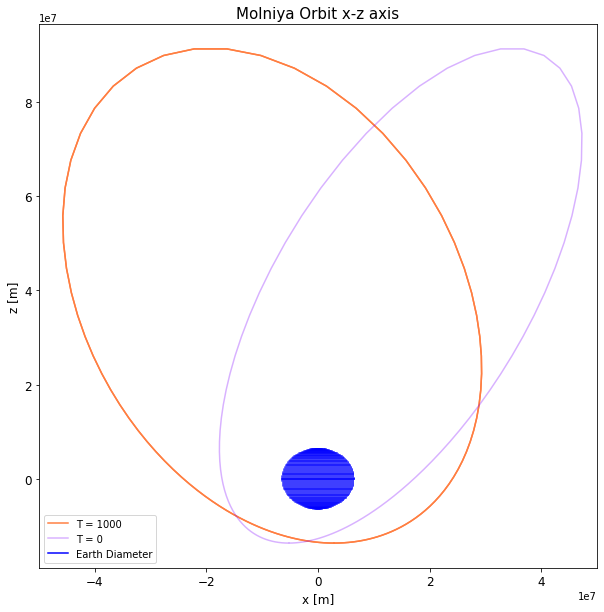

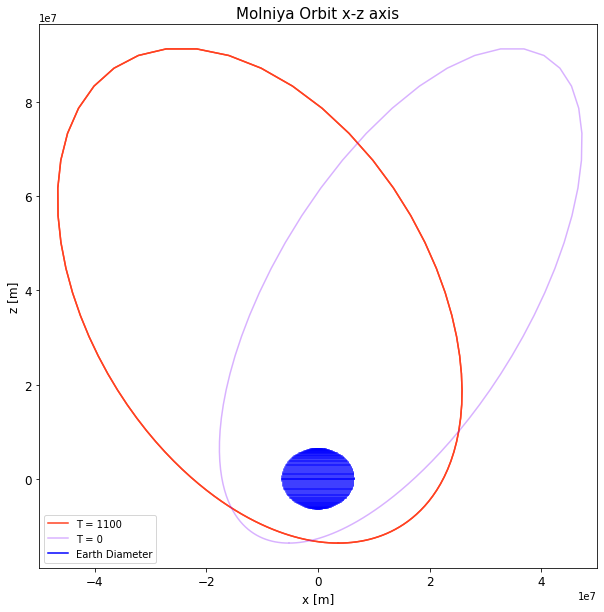

In [70]:
def plots(i):
    fig,ax = plt.subplots(figsize = (10,10))
    #ax.set_aspect('equal')

    ax.grid(False)

    ax.plot(x_1, z_1, color='b', alpha=0.5)
    color=cm.rainbow(np.linspace(0,1,len(eccm1)))
    ax.plot(xm[i], zm[i], c= color[i])
    ax.plot(xm[i], zm[i], c= color[i], label = "T = {}".format(i))
#     if i != 0:
#         ax.plot(xm[i-100], zm[i-100], c= color[i-100], alpha = 0.5, label = "T = {}".format(i-100))
    ax.plot(xm[0], zm[0], c= color[0], alpha = 0.3,label = "T = {}".format(0))
    x_coordinates = [-6.3781e6, 6.3781e6]
    y_coordinates = [0, 0]
    ax.plot(x_coordinates, y_coordinates, color='blue', label = "Earth Diameter")
    

    
    ax.set_xlabel("x [m]", fontsize = 12)
    ax.set_ylabel("z [m]", fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    
    plt.title("Molniya Orbit x-z axis", fontsize = 15)
    plt.legend()
    
    # IMPORTANT ANIMATION CODE HERE
    # Used to keep the limits constant
    ax.set_xlim(-5e7, 5e7)

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('./xzmolniya.gif', [plots(i) for i in range(0,len(eccm1),100)], fps=1)



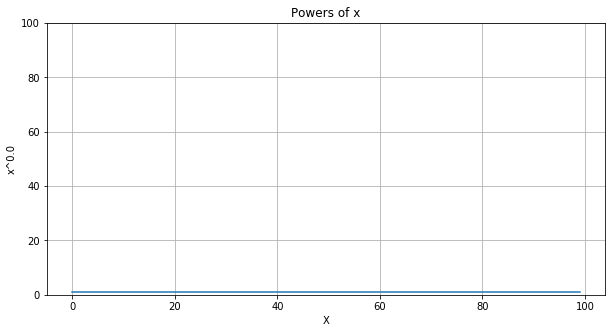

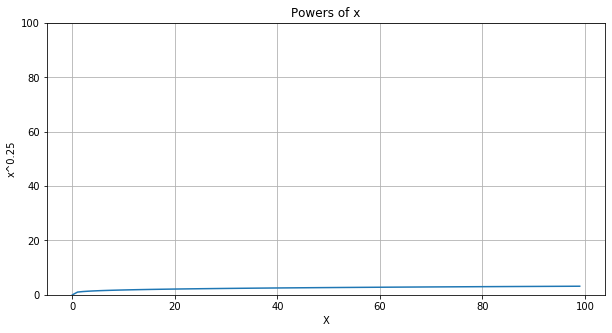

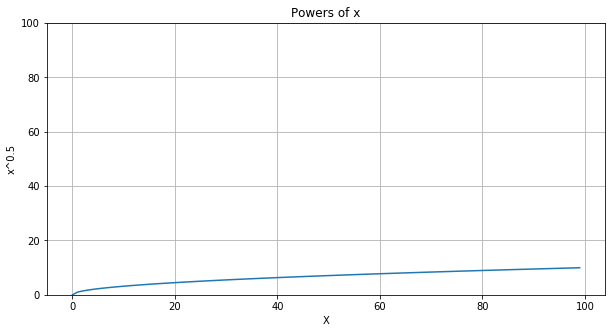

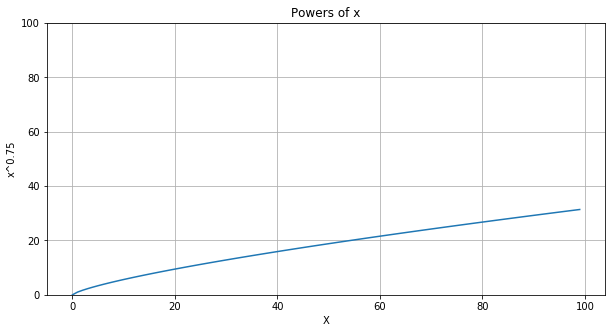

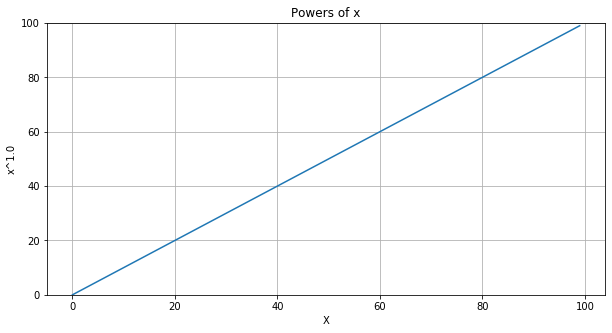

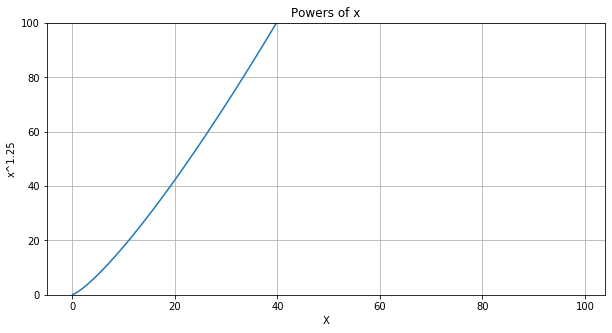

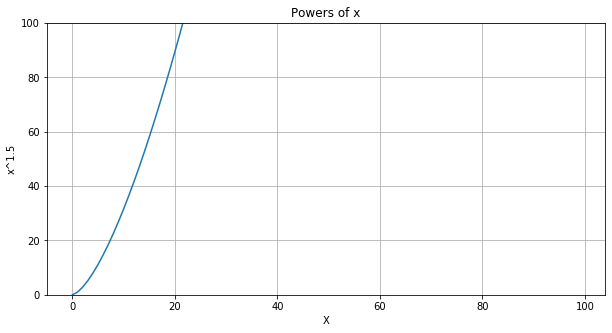

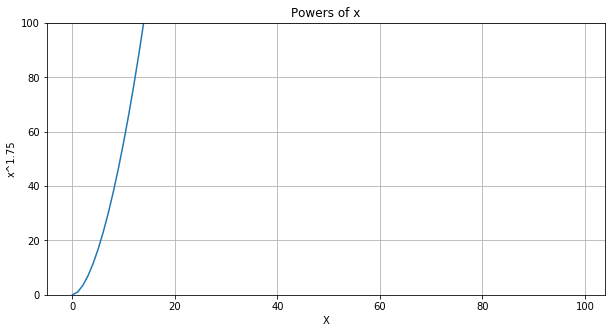

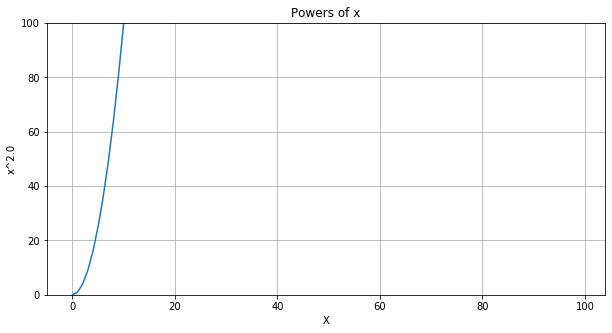

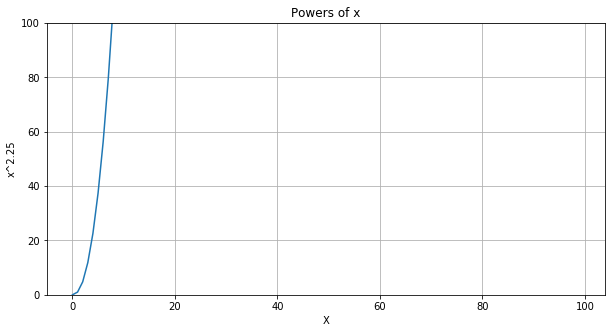

In [51]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imageio

def plot_for_offset(power, y_max):
    # Data for plotting
    t = np.arange(0.0, 100, 1)
    s = t**power

    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(t, s)
    ax.grid()
    ax.set(xlabel='X', ylabel='x^{}'.format(power),
           title='Powers of x')

    # IMPORTANT ANIMATION CODE HERE
    # Used to keep the limits constant
    ax.set_ylim(0, y_max)

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('./powers.gif', [plot_for_offset(i/4, 100) for i in range(10)], fps=1)

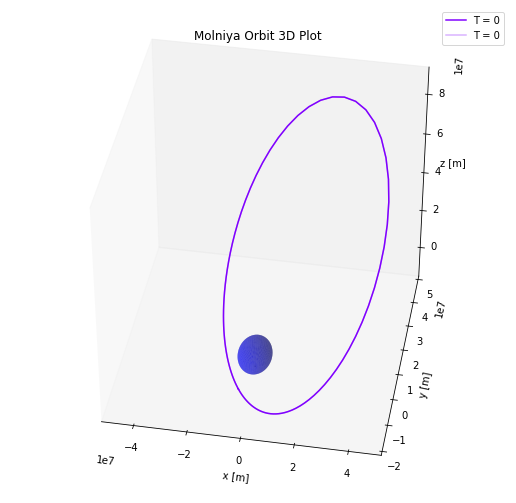

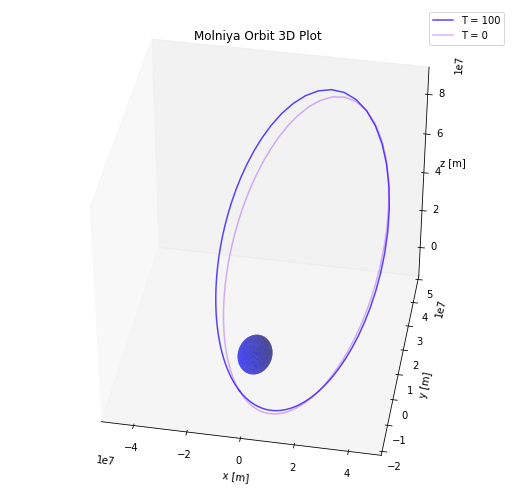

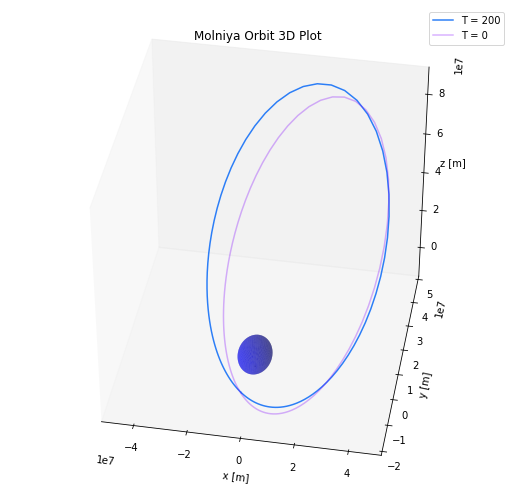

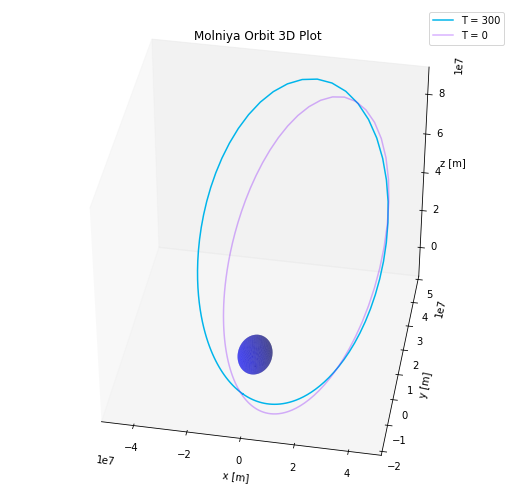

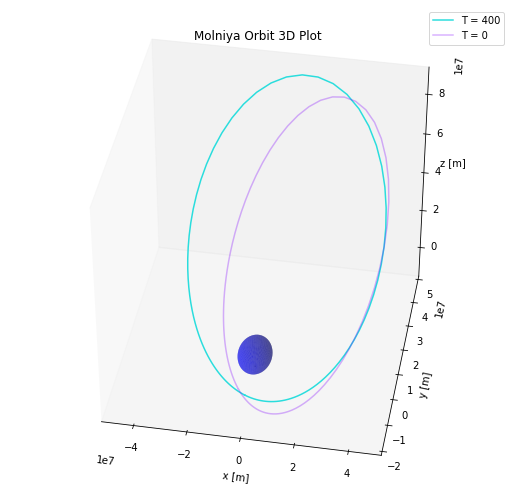

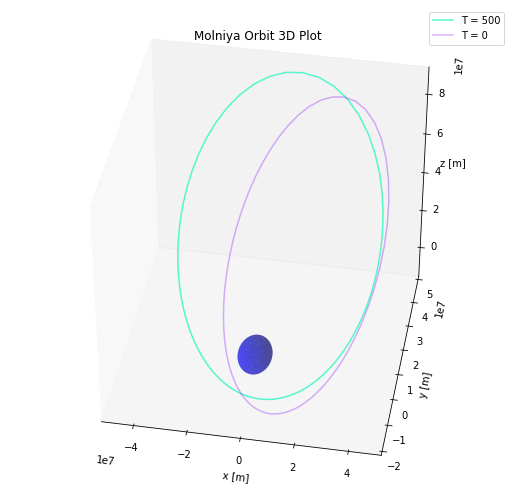

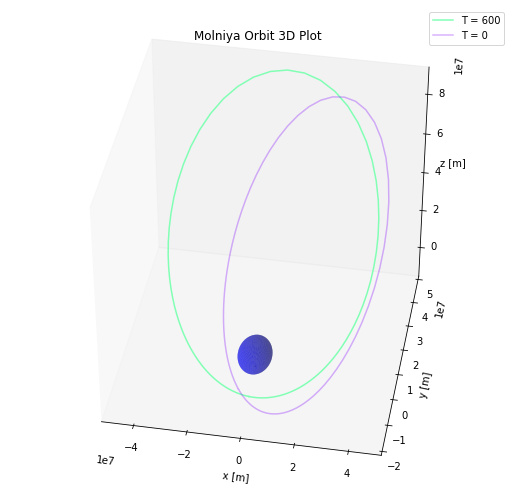

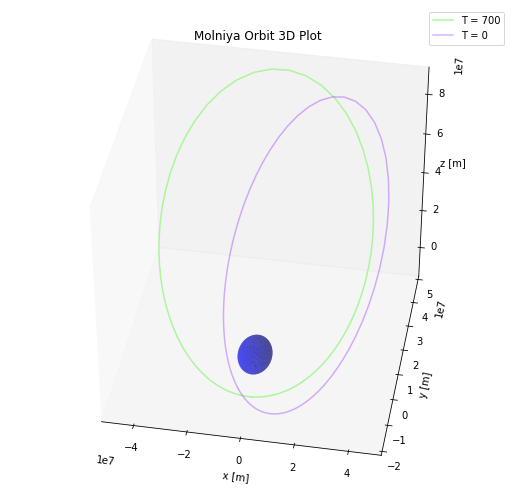

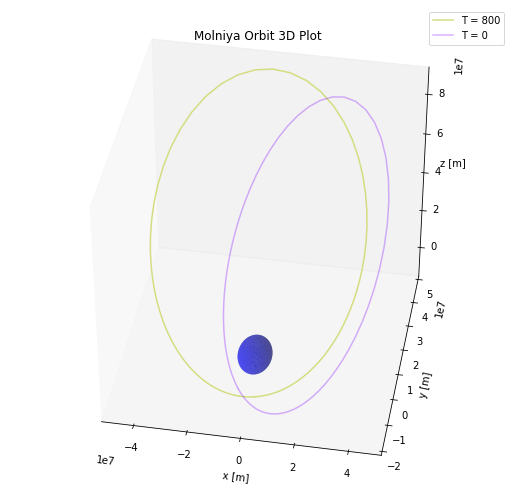

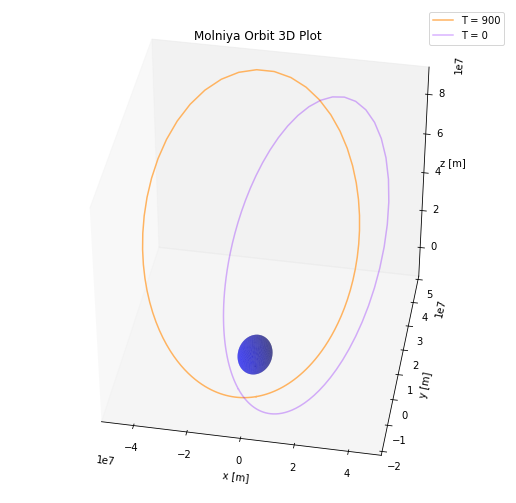

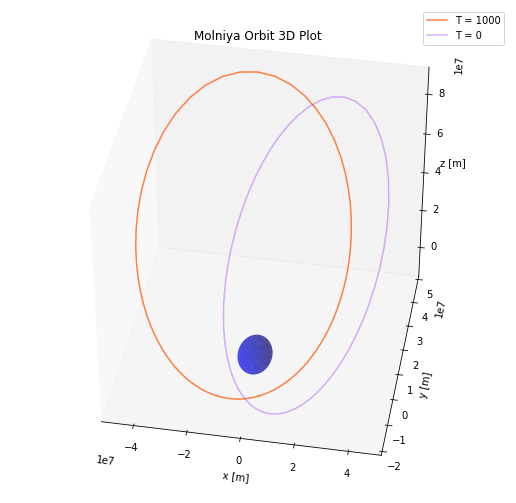

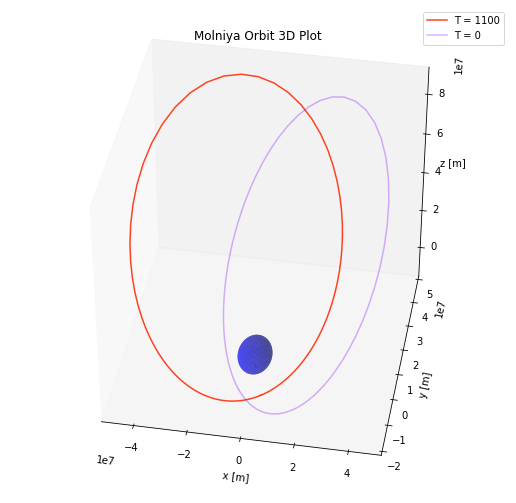

In [69]:
def plots(i):
    fig = plt.figure(figsize = (9,9))
    ax = plt.axes(projection='3d')
    #fig,ax = plt.subplots(figsize = (10,10))

    ax.grid(False)

    ax.plot_surface(x_1, y_1, z_1, color='b', linewidth=0, alpha=0.5)
    color=cm.rainbow(np.linspace(0,1,len(eccm1)))

    ax.plot(xm[i], ym[i], zm[i], c= color[i], label = "T = {}".format(i))

    ax.plot(xm[0], ym[0], zm[0], c= color[0], alpha = 0.3, label = "T = 0")
    #ax.plot(xm[1100], ym[1100], zm[1100], c= color[1100], label = "T = 1100")
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    ax.set_zlabel("z [m]")

    ax.zaxis.set_rotate_label(False)

    plt.title("Molniya Orbit 3D Plot")
    plt.legend()

    ax.view_init(elev = 40, azim =280) #nice nice
    
    ax.set_xlim(-5e7, 5e7)
    ax.set_ylim(-2e7, 5e7)

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('./3dmolniyas.gif', [plots(i) for i in range(0,len(eccm1),100)], fps=1)
